# Logikbasierter KI Agent

Dieses Jupyter Notebook widmet sich der Untersuchung und Implementierung eines logikbasierten KI-Agenten. Dabei werden folgende zentrale Themen behandelt:

- Forward Chaining
- Backward Chaining
- Beispiele für diese beiden Konzepte
- Vorteile so wie nachteile dieser beiden Konzepte
  
**Fragen, die in diesem Notebook beantwortet werden:**
1. Was sind die Grundprinzipien von Forward und Backward Chaining?
2. Wie werden diese Konzepte in praktischen Beispielen angewendet?
3. Welche Vor- und Nachteile bieten diese Methoden?

Input Datei Logische Regeln die verwendet werden:
- ∧ = AND
- => = Implikation



## Forward Chaining

Beim Forward Chaining beginnt man mit denn bekannten Fakten und wendet darauf die Regeln an, um neue Fakten abzluleiten, bis alle Ableitungen die möglich gewesen sind gemacht wurden.
### Schritt 1: 
Implementierung die tell Funktion, um alle bereits bekannten Fakten als wahr anzuerkennen.
### Schritt 2:
Implementierung der ask Funktion, um eine Anfrage zu starten und den Forward-Chaining-Prozess zu initiieren.
### Schritt 3: 
Zusätzlich zu denn Fakten gibt es ein Regelset: 
- Jede Regel hat eine oder mehrere Prämissen (Bedingungen, die erfüllt sein müssen)
- Einer Konklusion (ein neuer Fakt, der abgeleitet wird, wenn die Prämissen wahr sind).
### Schritt 4 (Wichtig):
Der Kern des Forward Chaining ist ein iterativer Prozess:
- Mehreren Prämissen (Bedingungen, die erfüllt sein müssen).
- Sind alle Prämissen erfüllt, wird die Konklusion als neuer Fakt abgeleitet und zu den bekannten Fakten hinzugefügt
### Schritt 5
Der Prozess wird wiederholt, bis keine neuen Fakten mehr abgeleitet werden können.

### Fluss Diagram Forward Chaining
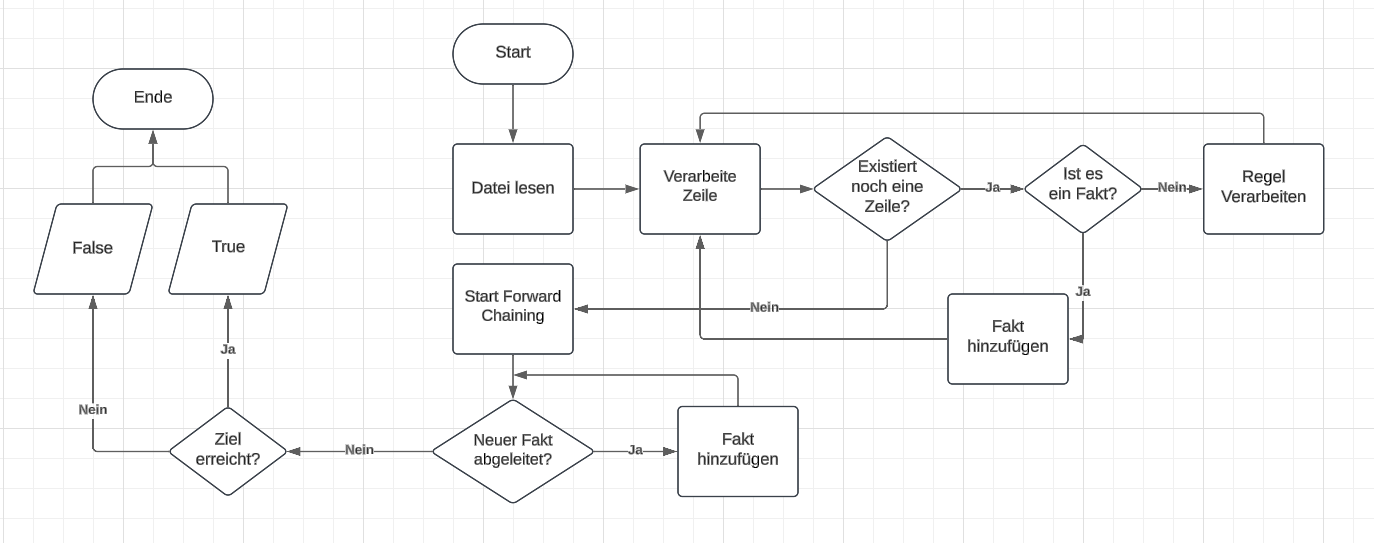

### Klasse Forward Chaining

In [1]:
class Forward_Chaining:
    def __init__(self):
        self.facts = set()  # Speicherung von Fakten
        self.rules = []  # Speicherung von Regeln

    def tell(self, clause):
        # Überprüft die Syntax der Eingabe und fügt Fakten oder Regeln zur Wissensbasis hinzu
        if "=>" in clause or "<=" in clause:
            try:
                if "=>" in clause:
                    parts = clause.split("=>", 1)
                else:
                    parts = clause.split("<=", 1)
                    parts = [parts[1], parts[0]]  # Vertausche conclusion und premise für "<="

                premise = parts[0].strip()
                conclusion = parts[1].strip()
                if premise == "":
                    self.facts.add(conclusion)
                else:
                    self.rules.append(([p.strip() for p in premise.split("∧")], conclusion))
            except IndexError:
                raise ValueError(f"Fehler beim Verarbeiten der Regel: {clause}")
        else:
            self.facts.add(clause.strip())

    def ask(self, query):
        # Prüft, ob ein bestimmtes Ziel mit Forward Chaining erreicht werden kann
        return self.forward_chaining(target=query)

    def forward_chaining(self, target=None):
        # Leitet neue Fakten ab, indem es die Regeln auf die bestehenden Fakten anwendet
        new_facts = True
        while new_facts:
            new_facts = False
            for premise, conclusion in self.rules:
                if all(item in self.facts for item in premise) and conclusion not in self.facts:
                    self.facts.add(conclusion)
                    new_facts = True  # Ein neuer Fakt wurde gefunden, weitere Iterationen sind nötig
                    # Falls ein Ziel angegeben ist und erreicht wurde, abbrechen
                    if target and conclusion == target:
                        return True
        return target in self.facts if target else self.facts

def read_import_file_FC(file_path):
    forward_chaining_knowledge = Forward_Chaining()
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            if line.strip():
                try:
                    forward_chaining_knowledge.tell(line.strip())
                except ValueError as e:
                    print(e)
    print("Fakten:", forward_chaining_knowledge.facts)
    print("Regeln:", [(f"{' ∧ '.join(body)} => {head}") for body, head in forward_chaining_knowledge.rules])
    return forward_chaining_knowledge


#### Beispiel txt Forward Chaining (exampleForward_chaining)

In [ ]:
with open("exampleForward_chaining.txt", 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        print(line)

### Forward Chaining Main Programm

In [ ]:
# Main Funktion um Forward Chaining zu Testen

if __name__ == "__main__":
    knowledge_file = 'exampleForward_chaining.txt'
    knowledge = read_import_file_FC(knowledge_file)
    # Was soll überprüft werden ob es Vorhanden ist?
    
    target = "C"

    result = knowledge.ask(target)
    print(f"Ist es möglich das Ziel {target} zu erreichen? //  {result}")
    if result:
        print(f"Ziel konnte erreicht werden.")
    else:
        print("Ziel konnte nicht erreicht werden.")
    new_facts = knowledge.forward_chaining()
    print("Neu abgeleitete Fakten nach Forward Chaining:", new_facts)

## Backward Chaining

Backward Chaining beginnt mit einem spezifischen Ziel und arbeitet rückwärts, indem es Regeln anwendet, um festzustellen, ob die Prämissen dieser Regeln durch bereits bekannte Fakten oder weitere Ableitungen erfüllt werden können.

### Schritt 1:

Implementierung der tell Funktion, um Regeln und Fakten in die Wissensbasis einzufügen. Diese Funktion speichert alle bekannten Fakten sowie Regeln, die aus Prämissen und einer Konklusion bestehen.

### Schritt 2:

Implementierung der ask Funktion, um eine Anfrage zu starten und den Backward-Chaining-Prozess zu initiieren.

### Schritt 3 (Wichtig):
Der Prozess:

- Direkte Überprüfung ob das Ziel bereits als bekannter Fakt vorliegt
- Falls nicht, suche Regeln, deren Konklusion das Ziel ist. Dann mu man prüfen ob die Prämissen dieser Regeln durch andere bekannte Fakter oder Ableitungen aus anderen Regeln erfüllt werden.
- Dies erfolgt rekursiv: Für jede benötigte Prämisse wird der gleiche Prozess wiederholt, bis entweder das Ziel bestätigt oder als unerreichbar verworfen wird.

### Schritt 4
Der Prozess endet, wenn das Ziel als erreichbar bestätigt oder endgültig verworfen wird. Dies hängt von den in der Wissenbasis verfügbaren Informationen und der Verknüpfung von Regeln ab.

### Fluss Diagram Backward Chaining
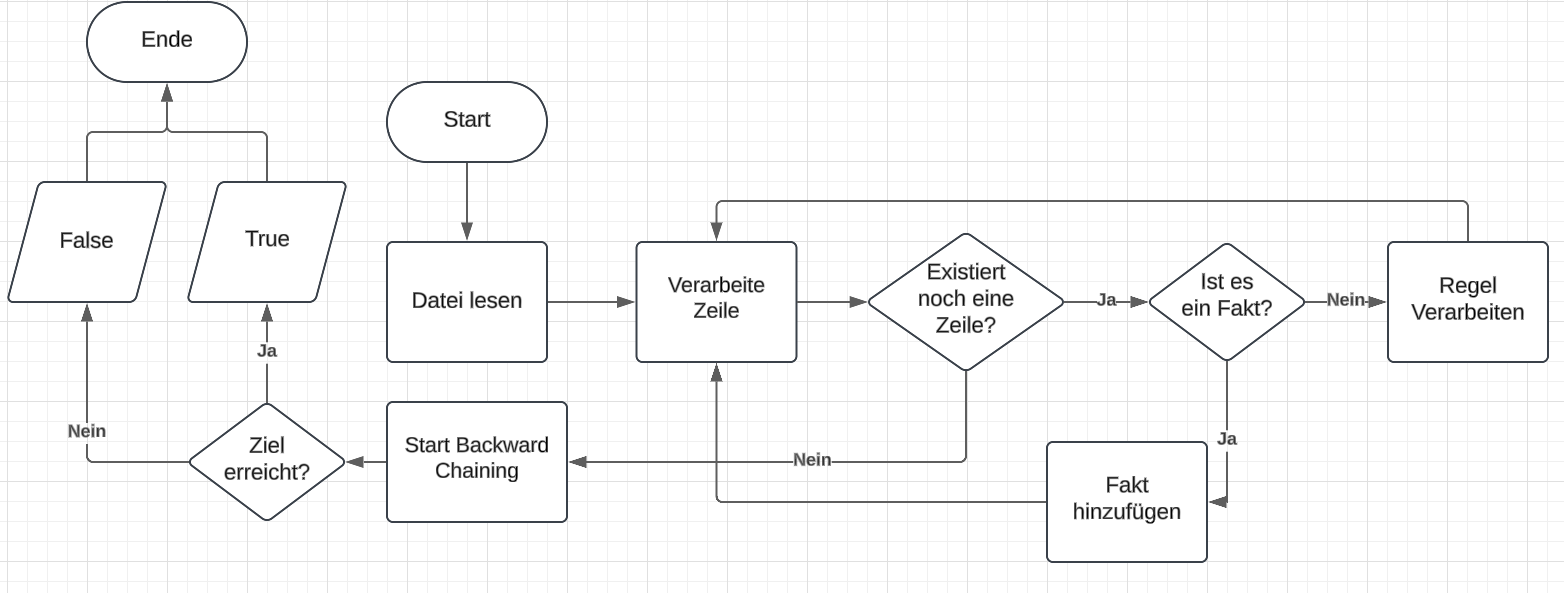

### Klasse Backward Chaining

In [4]:
class Backward_Chaining:
    def __init__(self):
        self.facts = set()  # Speicherung von Fakten
        self.rules = []  # Speicherung von Regeln
        self.max_depth = 20  # Maximale Tiefe für die Rekursion zur Vermeidung von Endlosschleifen

    def tell(self, clause):
        # Fügt Fakten oder Regeln zur Wissensbasis hinzu
        if "=>" in clause or "<=" in clause:
            try:
                if "=>" in clause:
                    parts = clause.split("=>", 1)
                else:
                    parts = clause.split("<=", 1)
                    parts.reverse()  # Vertausche conclusion und premise für "<="

                premise = parts[0].strip()
                conclusion = parts[1].strip()
                if premise == "":
                    self.facts.add(conclusion)
                else:
                    self.rules.append(([p.strip() for p in premise.split("∧")], conclusion))
            except IndexError:
                raise ValueError(f"Fehler beim Verarbeiten der Regel: {clause}")
        else:
            self.facts.add(clause.strip())

    def ask(self, query):
        # Startet den Prozess des Backward Chaining, um eine Anfrage zu beantworten.
        result = self.backward_chaining([query], 0)
        return result if isinstance(result, bool) else False  # Standardwert bei Fehlern

    def backward_chaining(self, goals, depth):
        if depth > self.max_depth:
            raise RecursionError(f"Maximale Rekursionstiefe von {self.max_depth} erreicht")
        if not goals:
            return True  # Keine Ziele mehr zu prüfen, bedeutet Erfolg

        goal = goals.pop().strip()
        if goal in self.facts:
            return self.backward_chaining(goals, depth + 1)

        for body, head in self.rules:
            if head == goal:
                new_goals = list(goals)
                new_goals.extend(body)
                if self.backward_chaining(new_goals, depth + 1):  # Hier nur bool-Werte verwenden
                    return True
        return False  # Keine Regel konnte das Ziel beweisen

def read_import_fileBC(file_path):
    Backward_Chaining_knowledge = Backward_Chaining()
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            if line.strip():
                Backward_Chaining_knowledge.tell(line.strip())
    print("Fakten:", Backward_Chaining_knowledge.facts)
    print("Regeln:", [(f"{' ∧ '.join(body)} => {head}") for body, head in Backward_Chaining_knowledge.rules])
    return Backward_Chaining_knowledge


#### Beispiel txt Backward Chaining (exampleBackward_chaining.txt)

In [ ]:
with open("exampleBackward_chaining.txt", 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        print(line)

### Backward Chaining Main Programm

In [ ]:
# Main Funktion beim Backward Chaining
if __name__ == "__main__":
    knowledge_file = 'exampleBackward_chaining.txt'
    knowledge = read_import_fileBC(knowledge_file)

    # Was soll überprüft werden ob es Vorhanden ist?
    query = "B"

    result = knowledge.ask(query)
    print(f"Ist es möglich das Ziel {query} zu erreichen? //  {result}")

    if result:
        print(f"Ziel konnte erreicht werden.")
    else:
        print("Ziel konnte nicht erreicht werden.")


## Back und Forward Beispiele die nicht Funktionieren

### Beispiel txt (exampleDontWork.txt)

In [ ]:
with open("exampleDontWork.txt", 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        print(line)

### Forward Chaining Beispiel, das nicht funktioniert
Beim Forward Chaining geht man durch die möglichen Fakten und versucht so sein Ziel zu finden, Wenn dies nicht Vorhanden ist, dann findet man sein Zeil nicht.

In [ ]:
# Forward Chaining
if __name__ == "__main__":
    knowledge_file = 'exampleDontWork.txt'
    knowledge = read_import_file_FC(knowledge_file)
    
    target = "E"

    result = knowledge.ask(target)
    print(f"Ist es möglich das Ziel {target} zu erreichen? //  {result}")
    if result:
        print(f"Ziel konnte erreicht werden.")
    else:
        print("Ziel konnte nicht erreicht werden.")
        
    new_facts = knowledge.forward_chaining()
    print("Neu abgeleitete Fakten nach Forward Chaining:", new_facts)

### Backward Chaining Beispiel, das nicht funktioniert
Beim Backward Chaining geht man von seinem Ziel aus zurück und Versucht mit diesen Fakten, sein Ziel zu erreichen.

In [ ]:
# Main Funktion beim Backward Chaining
if __name__ == "__main__":
    knowledge_file = 'exampleDontWork.txt'
    knowledge = read_import_fileBC(knowledge_file)

    # Was soll überprüft werden ob es Vorhanden ist?
    query = "F"
    result = knowledge.ask(query)
    
    print(f"Ist es möglich das Ziel {query} zu erreichen? //  {result}")
    if result:
        print(f"Ziel konnte erreicht werden.")
    else:
        print("Ziel konnte nicht erreicht werden.")

## Was ist schneller bei einer Großen Datenmänge?

Im Folgenden Werde ich die Vorteile sowie die Nachteile von Forward Chaining und Backward Chaining beleuchten

### Forward Chaining
#### Vorteile:
- Berechnung aller Fakten: 
  - Mit Forward Chaining können alle möglichen Fakten abgeleitet werden. Dies ist besonders hilfreich, wenn eine vollständige Analyse der Wissensbasis erforderlich ist, ohne dass ein bestimmtes Ziel geprüft werden muss.
- Einmalige Berechnung:
  - Nachdem alle Fakten abgeleitet wurden, können beliebig viele Abfragen gestellt werden, ohne dass der Prozess erneut durchlaufen werden muss.
#### Nachteile:
- Ineffizienz
  - Bei großen Wissensbasen mit vielen Regeln und Fakten kann Forward Chaining zeitaufwendig und speicherintensiv sein, da alle möglichen Fakten berechnet werden.
- Unnötige Berechnungen:
  - Es werden auch Fakten abgeleitet, die möglicherweise nicht für die aktuelle Fragestellung relevant sind.

#### In welchen Szenarien ist Forward Chaining sinnvoll?

- Wenn alle potenziell ableitbaren Fakten benötigt werden.
- Wenn die Wissensbasis klein oder schnell zu verarbeiten ist.
- Wenn zukünftige Abfragen auf den bereits berechneten Fakten basieren sollen.

### Backward Chaining
#### Vorteile:
- Gezielte Suche:
  - Backward Chaining beginnt mit einem spezifischen Ziel und arbeitet rückwärts, um die relevanten Fakten oder Regeln zu finden. Dadurch wird nur geprüft, was für das Ziel erforderlich ist.
- Effizienz bei klaren Zielen:
    - Bei der Überprüfung eines einzelnen Ziels ist Backward Chaining oft schneller, da es unnötige Berechnungen vermeidet.
#### Nachteile:
- Ungeeignet für viele Ziele:
  - Backward Chaining muss für jedes Ziel separat durchgeführt werden, was bei vielen Abfragen zeitaufwendig sein kann.
- Komplexität bei verschachtelten Abhängigkeiten
  - Wenn ein Ziel auf viele verschachtelte Regeln oder Bedingungen angewiesen ist, kann der Prozess durch Rekursion ineffizient werden.

#### In welchen Szenarien ist Backward Chaining sinnvoll?

- Wenn ein spezifisches Ziel überprüft werden soll.
- Wenn nur wenige Ziele abgefragt werden.
- Wenn die Wissensbasis groß und komplex ist, aber das Ziel sich auf eine begrenzte Anzahl von Regeln bezieht.

## Mögliche Probleme und Einschränkungen

Die Implementierung des Forward Chaining und Backward Chaining in diesem Notebook ist grundlegend und dient vor allem dem Lehrzweck. Es gibt jedoch einige Einschränkungen und potenzielle Probleme:
- **Skalierbarkeit:** Die Performance kann bei sehr großen Datenmengen leiden.
- **Vollständigkeit:** Es ist nicht garantiert, dass alle möglichen Fakten immer abgeleitet werden, besonders in komplexen Szenarien.
- **Effizienz:** Beide Methoden können in bestimmten Kontexten ineffizient sein, wie bereits in den Vorteilen/Nachteilen diskutiert.

## Quellen
- Dieses Video diente als Einstieg und erklärte sehr sinnvoll den Unterschied zwischen Backward Chaining und Forward Chaining
  - https://www.youtube.com/watch?v=EZJs6w2YFRM
- Ebenfalls die Informationen aus den Vorlesungen
- ChatGPT um allgemein Rechtschreibung zu überprüfen
  - https://chatgpt.com
